In [1]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

C:\Users\abhir\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


C:\Users\abhir\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from lime import lime_image
from skimage.segmentation import mark_boundaries 

In [3]:
# Load the trained model
model = load_model('cnn10 augmentation.h5')

In [19]:
# Load an example image
img_path = 'ALL dataset without augmentation\Pro\WBC-Malignant-Pro-173.jpg'
img = cv2.imread(img_path)
img=  cv2.resize(img,(224,224))
img = img/255

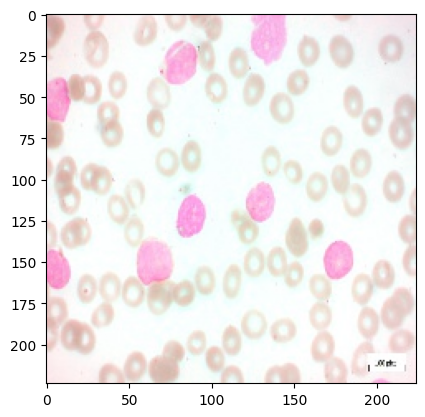

In [20]:
plt.imshow(img)
plt.show()

In [21]:
np.shape(img)

(224, 224, 3)

In [22]:
image = np.expand_dims(img, axis=0) 

In [23]:
# Predict the class
prediction = model.predict(image)

1/1 [==============================] - 0s 100ms/step


In [24]:
prediction

array([[1.5608666e-07, 2.3282198e-06, 1.1682834e-04, 9.9988067e-01]],
      dtype=float32)

In [25]:
predicted_class_index = np.argmax(model.predict(image))

1/1 [==============================] - 0s 72ms/step


In [26]:
#Benign - 0, Early -1, Pre-2, Pro-3

predicted_class_index

3

In [27]:
# Initialize LIME image explainer
explainer = lime_image.LimeImageExplainer()

In [28]:
# Explanation
explanation = explainer.explain_instance(img, model.predict, top_labels=1, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 172ms/step


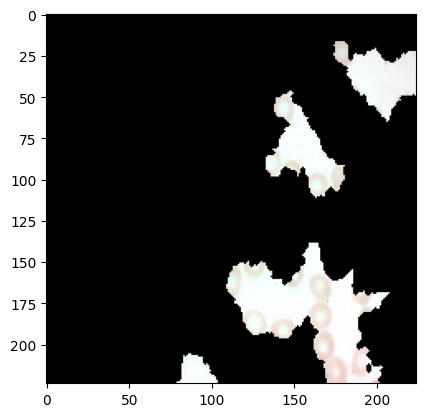

In [29]:
# Display the image with most contributing regions
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask,color=(0,0,0),mode="thick"))
plt.show()


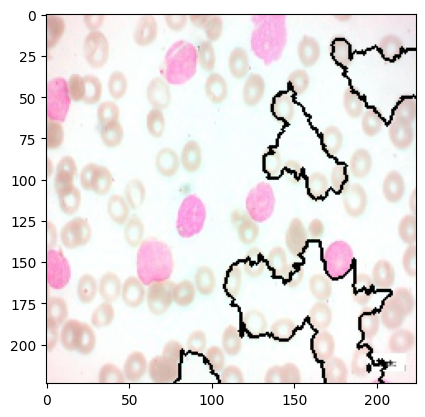

In [30]:
# Display the whole image 
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask,color=(0,0,0),mode="thick"))
plt.show()
